In [1]:
import sys
sys.path.insert(1, '../src/')
from scot import *
import model1 as model1
import model2 as model2

### Datasets from SCOT paper (citation: https://rsinghlab.github.io/SCOT/)

In [2]:
X=np.load("../data/scatac_feat.npy") 
y=np.load("../data/scrna_feat.npy")
print("Dimensions of input datasets are: ", "X= ", X.shape, " y= ", y.shape)

Dimensions of input datasets are:  X=  (1047, 19)  y=  (1047, 10)


### Toy example from the datasets with X.shape = (5,3) and y.shape = (5,5)

In [3]:
X_example = X[0:5,0:3]
print(X_example)

[[60197.  6248.  4661.]
 [66853.  5991. 77816.]
 [13579.  1527.  1360.]
 [71872.  5936.  2560.]
 [30420.  3778.  2096.]]


In [4]:
y_example = y[0:5,0:5]
print(y_example)

[[  6.6883364   -2.3696006    2.14278082  -0.28129481   0.0990671 ]
 [ -1.64704263   3.87629104  -2.57201982  -0.26799879  -0.10307687]
 [ -3.22729615   4.55422489 -10.10911411  -0.35633895   0.13389332]
 [  8.39902905  -5.00142347  -0.21591065   0.20100497   0.11180953]
 [ 10.40509703  -5.58712509   0.23241886  -0.31585508  -0.36511944]]


#### For Model 1, the input are the two datasets X and y, and the output are C1_opt and C2_opt where the Gromov Wasserstein Distance between C1_opt and C2_opt is smaller than that between C1 and C2. 

(Note that C1 and C2 are the pairwise distance matrices of X and y, respectively).

model start
iter 0
It.  |Err         
-------------------
    0|1.283716e-01|
   10|9.413842e-07|
It.  |Err         
-------------------
    0|1.891161e-01|
   10|0.000000e+00|
It.  |Err         
-------------------
    0|1.676188e-01|
   10|3.811887e-03|
   20|2.638953e-05|
iter 1
It.  |Err         
-------------------
    0|1.522018e-01|
   10|1.192906e-03|
   20|1.507837e-05|
It.  |Err         
-------------------
    0|1.916449e-01|
   10|3.649787e-07|
It.  |Err         
-------------------
    0|1.706327e-01|
   10|5.186692e-06|
iter 2
It.  |Err         
-------------------
    0|1.499083e-01|
   10|3.897361e-04|
   20|2.802950e-06|
It.  |Err         
-------------------
    0|1.824069e-01|
   10|2.219750e-08|
It.  |Err         
-------------------
    0|1.677748e-01|
   10|8.372836e-06|
iter 3
It.  |Err         
-------------------
    0|1.537877e-01|
   10|1.355435e-05|
It.  |Err         
-------------------
    0|1.790740e-01|
   10|2.136660e-08|
It.  |Err         
------------

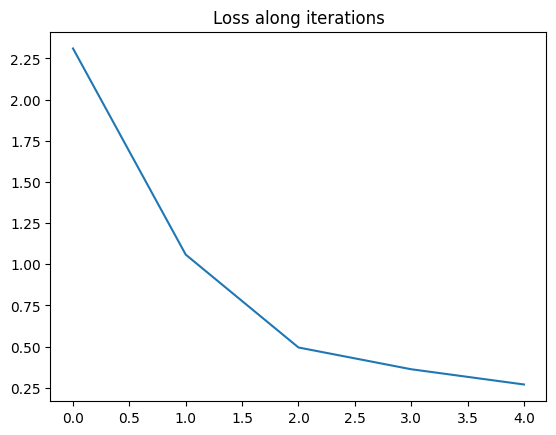

In [5]:
C1, C2, C1_opt, C2_opt = model1.model(X_example, y_example,epsilon =1e-1, tol= 1e-4, lr = 1, n_neighbors = 3)

In [6]:
C1

array([[0.        , 0.76248841, 0.02390867, 0.04639248, 0.02184711],
       [0.76248841, 0.        , 0.74193054, 0.80051402, 0.77083552],
       [0.02390867, 0.74193054, 0.        , 0.0702034 , 0.03301074],
       [0.04639248, 0.80051402, 0.0702034 , 0.        , 0.05257014],
       [0.02184711, 0.77083552, 0.03301074, 0.05257014, 0.        ]])

In [7]:
C2

array([[0.        , 1.84358657, 1.80508104, 0.37252863, 0.31379649],
       [1.84358657, 0.        , 0.53137166, 1.83138424, 1.82863962],
       [1.80508104, 0.53137166, 0.        , 1.68678457, 1.70226317],
       [0.37252863, 1.83138424, 1.68678457, 0.        , 0.08790316],
       [0.31379649, 1.82863962, 1.70226317, 0.08790316, 0.        ]])

In [8]:
C1_opt

array([[ 0.        ,  1.3024572 ,  0.57170326, -0.10610238, -0.15481238],
       [ 1.0724078 ,  0.        ,  0.7761474 ,  1.0965401 ,  1.076925  ],
       [ 0.977336  ,  0.212552  ,  0.        ,  1.0039603 ,  0.96368736],
       [-0.0380483 ,  1.2692355 ,  0.40521434,  0.        , -0.03322345],
       [-0.00361463,  1.2442073 ,  0.5776353 ,  0.00594325,  0.        ]],
      dtype=float32)

In [9]:
C2_opt

array([[ 0.        ,  1.6337903 ,  1.553165  ,  1.0967761 ,  0.7476596 ],
       [ 1.5542763 ,  0.        ,  0.7309342 ,  1.5515637 ,  1.5506452 ],
       [ 1.3929435 ,  0.5335113 ,  0.        ,  1.3220189 ,  1.3306637 ],
       [ 0.4689443 ,  1.590138  ,  1.0554875 ,  0.        ,  0.00324949],
       [ 0.49228606,  1.5906514 ,  1.0185099 , -0.36214882,  0.        ]],
      dtype=float32)

In [10]:
p = ot.unif(C1.shape[0])
q = ot.unif(C2.shape[0])
distance_C1_C2 = ot.gromov.entropic_gromov_wasserstein2(C1, C2, p, q, loss_fun = 'square_loss', epsilon=1e-2)
print('distance between C1 and C2:', distance_C1_C2)

distance between C1 and C2: 0.9749538719413066


In [11]:
p = ot.unif(C1_opt.shape[0])
q = ot.unif(C2_opt.shape[0])
distance_C1_opt_C2_opt = ot.gromov.entropic_gromov_wasserstein2(C1_opt, C2_opt, p, q, loss_fun = 'square_loss', epsilon=1e-2)
print('distance between C1_opt and C2_opt:', distance_C1_opt_C2_opt)

distance between C1_opt and C2_opt: 0.445818507558624


#### Conclusion: the Gromov Wasserstein Distance between C1_opt and C2_opt is smaller than that between C1 and C2.

In [12]:
p = ot.unif(C1_opt.shape[0])
q =  ot.unif(C2_opt.shape[0])
P = ot.gromov.entropic_gromov_wasserstein(C1_opt, C2_opt, p, q, loss_fun='square_loss', epsilon = 1e-1, log=False, verbose=True)

It.  |Err         
-------------------
    0|1.516063e-01|
   10|1.240787e-07|
   20|1.221517e-13|


In [13]:
# projection
#Projecting the first domain onto the second domain
y_new=normalize(y_example)
weights=np.sum(P,axis = 0)
X_new =np.matmul(P, normalize(y_example)) / weights[:, None]

In [14]:
import evals 

# We will use the average FOSCTTM measure implemented in evals.py for evaluation (metric used in the publication Demetci et al 2021)
# This measure reports the fraction of samples closer to a sample than its true match (FOSCTTM), averaged over all samples. 
fracs=evals.calc_domainAveraged_FOSCTTM(X_new, y_new)
print("Average FOSCTTM score for this alignment with X onto Y is: ", np.mean(fracs))

Average FOSCTTM score for this alignment with X onto Y is:  0.15


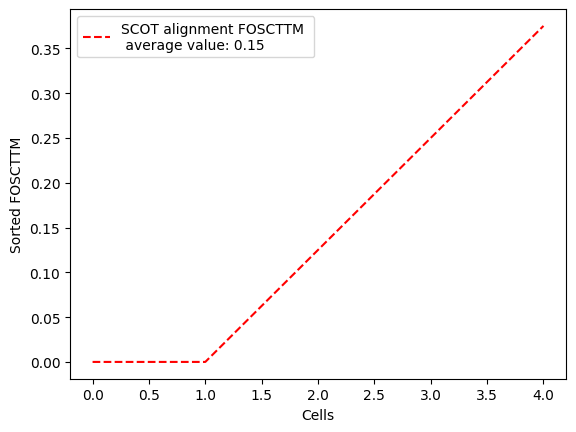

In [15]:
#Plotting sorted FOSCTTM to show the distributions of FOSCTTM across cells:

import matplotlib.pyplot as plt
legend_label="SCOT alignment FOSCTTM \n average value: "+str(np.mean(fracs)) #Put average FOSCTTM in the legend
plt.plot(np.arange(len(fracs)), np.sort(fracs), "r--", label=legend_label)
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()

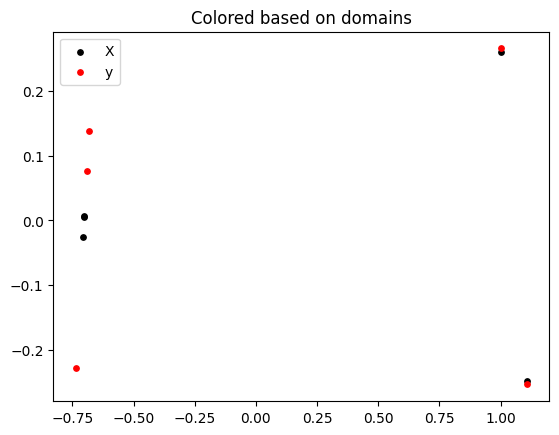

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Reduce the dimensionality of the aligned domains to two (2D) via PCA for the sake of visualization:
pca=PCA(n_components=2)
Xy_pca=pca.fit_transform(np.concatenate((X_new, y_new), axis=0))
X_pca = Xy_pca[0:5,]
y_pca = Xy_pca[5:,]

#Plot aligned domains, samples colored by domain identity:
# plt.scatter(X_pca[:,0], X_pca[:,1], c="k", s=15, label="Chromatin Accessibility")
# plt.scatter(y_pca[:,0], y_pca[:,1], c="r", s=15, label="Gene Expression")
plt.scatter(X_pca[:,0], X_pca[:,1], c="k", s=15, label="X")
plt.scatter(y_pca[:,0], y_pca[:,1], c="r", s=15, label="y")
plt.legend()
plt.title("Colored based on domains")
plt.show()

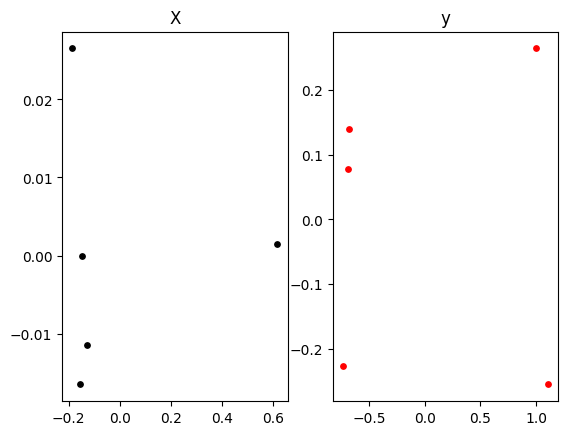

In [17]:
originalX_pca=pca.fit_transform(normalize(X_example))
originaly_pca=pca.fit_transform(normalize(y_example))

#Visualization of the global geometry
fig, (ax1, ax2)= plt.subplots(1,2)
ax1.scatter(originalX_pca[:,0], originalX_pca[:,1], c="k", s=15)
ax1.set_title("X")
# ax1.set_title("Chromatin Accessibiliy Domain \n *before* Alignment")
ax2.scatter(originaly_pca[:,0], originaly_pca[:,1], c="r", s=15)
# ax2.set_title("Gene Expression Domain \n *before* Alignment")
ax2.set_title("y")
plt.show()

In [18]:
# initialize SCOT object
original_scot=SCOT(X_example, y_example)
# call the alignment with l2 normalization 
X_new, y_new = original_scot.align(k=5, e=1e-3,  normalize=True, norm="l2")

It.  |Err         
-------------------
    0|1.040834e-16|


In [19]:
import evals 

# We will use the average FOSCTTM measure implemented in evals.py for evaluation (metric used in the publication Demetci et al 2021)
# This measure reports the fraction of samples closer to a sample than its true match (FOSCTTM), averaged over all samples. 
fracs=evals.calc_domainAveraged_FOSCTTM(X_new, y_new)
print("Average FOSCTTM score for this alignment with X onto Y is: ", np.mean(fracs))

Average FOSCTTM score for this alignment with X onto Y is:  0.25


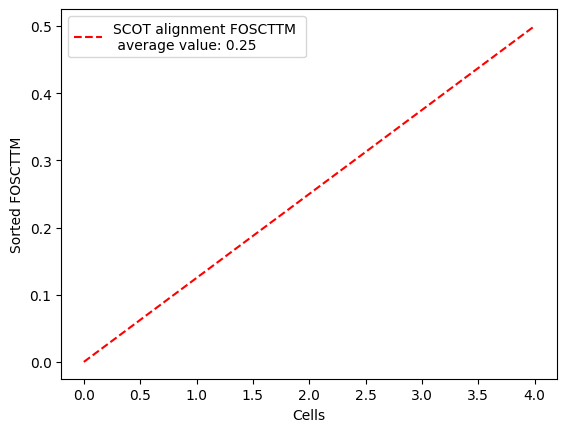

In [20]:
#Plotting sorted FOSCTTM to show the distributions of FOSCTTM across cells:

import matplotlib.pyplot as plt
legend_label="SCOT alignment FOSCTTM \n average value: "+str(np.mean(fracs)) #Put average FOSCTTM in the legend
plt.plot(np.arange(len(fracs)), np.sort(fracs), "r--", label=legend_label)
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()

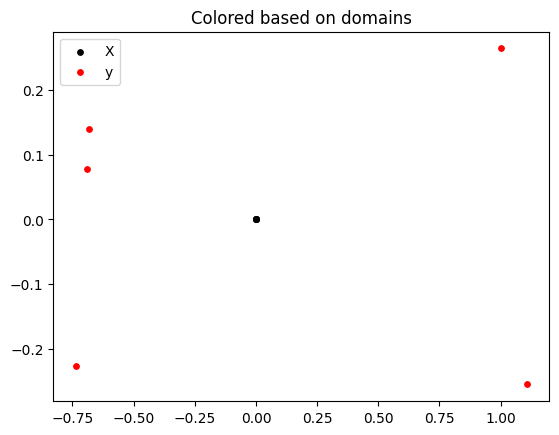

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Reduce the dimensionality of the aligned domains to two (2D) via PCA for the sake of visualization:
pca=PCA(n_components=2)
Xy_pca=pca.fit_transform(np.concatenate((X_new, y_new), axis=0))
X_pca = Xy_pca[0:5,]
y_pca = Xy_pca[5:,]

#Plot aligned domains, samples colored by domain identity:
# plt.scatter(X_pca[:,0], X_pca[:,1], c="k", s=15, label="Chromatin Accessibility")
# plt.scatter(y_pca[:,0], y_pca[:,1], c="r", s=15, label="Gene Expression")
plt.scatter(X_pca[:,0], X_pca[:,1], c="k", s=15, label="X")
plt.scatter(y_pca[:,0], y_pca[:,1], c="r", s=15, label="y")
plt.legend()
plt.title("Colored based on domains")
plt.show()

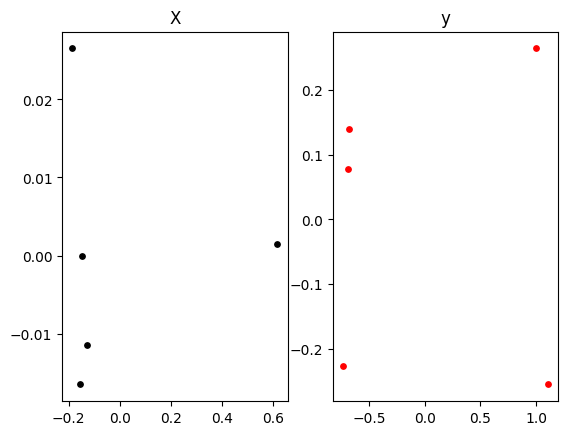

In [22]:
originalX_pca=pca.fit_transform(original_scot.X)
originaly_pca=pca.fit_transform(original_scot.y)

#Visualization of the global geometry
fig, (ax1, ax2)= plt.subplots(1,2)
ax1.scatter(originalX_pca[:,0], originalX_pca[:,1], c="k", s=15)
# ax1.set_title("Chromatin Accessibiliy Domain \n *before* Alignment")
ax1.set_title("X")
ax2.scatter(originaly_pca[:,0], originaly_pca[:,1], c="r", s=15)
# ax2.set_title("Gene Expression Domain \n *before* Alignment")
ax2.set_title("y")
plt.show()

#### Conclusion: Compared to the SCOT algorithm (from the paper https://rsinghlab.github.io/SCOT/), the FOSCTTM alignment score is smaller than that of SCOT, which means that Model 1 performs better alignment than SCOT on the toy example.

#### For Model 2, the input are the two datasets X and y, but only C1, which is the pairwise distance matrix of X is used. In other words, use Model 1, but initialize C2 to be equal to C1 in Model 1. The output are C1_opt and C2_opt where the Gromov Wasserstein Distance between C1_opt and C2_opt is the smallest.

(Note that C1 and C2 are the pairwise distance matrices of X and y, respectively.
More importantly, note that Model 2 is used only to check for the performance of Model 1 when using only one dataset, to see whether C1_opt and C2_opt has a difference in the Gromov Wasserstein Distance within the expected range $10^{-3}$ or smaller). 

model start
iter 0
It.  |Err         
-------------------
    0|2.731694e-02|
   10|1.219144e-07|
It.  |Err         
-------------------
    0|2.731694e-02|
   10|1.219144e-07|
iter 1
It.  |Err         
-------------------
    0|1.994231e-02|
   10|7.136629e-08|
It.  |Err         
-------------------
    0|1.994231e-02|
   10|7.136629e-08|
iter 2
It.  |Err         
-------------------
    0|9.446934e-03|
   10|2.326443e-08|
It.  |Err         
-------------------
    0|9.446934e-03|
   10|2.326443e-08|
iter 3
It.  |Err         
-------------------
    0|1.065142e-02|
   10|1.580507e-08|
It.  |Err         
-------------------
    0|1.065142e-02|
   10|1.580507e-08|
iter 4
It.  |Err         
-------------------
    0|7.977368e-03|
   10|2.526615e-08|
It.  |Err         
-------------------
    0|7.977368e-03|
   10|2.526615e-08|
model takes 11.451588 seconds


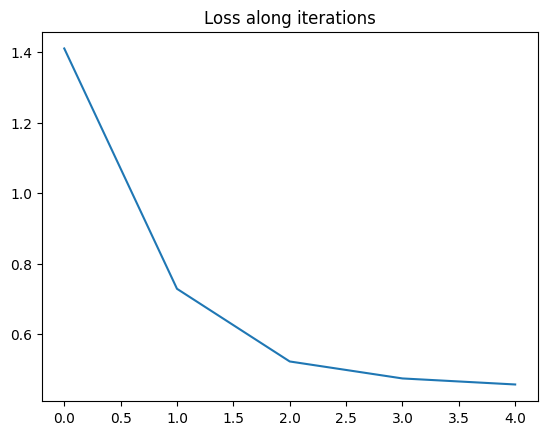

In [23]:
C1, C2, C1_opt, C2_opt = model2.model(X_example, y_example,epsilon =1, tol= 1e-4, lr = 1, n_neighbors = 3)

In [24]:
C1

array([[0.        , 0.76248841, 0.02390867, 0.04639248, 0.02184711],
       [0.76248841, 0.        , 0.74193054, 0.80051402, 0.77083552],
       [0.02390867, 0.74193054, 0.        , 0.0702034 , 0.03301074],
       [0.04639248, 0.80051402, 0.0702034 , 0.        , 0.05257014],
       [0.02184711, 0.77083552, 0.03301074, 0.05257014, 0.        ]])

In [25]:
C2

array([[0.        , 1.84358657, 1.80508104, 0.37252863, 0.31379649],
       [1.84358657, 0.        , 0.53137166, 1.83138424, 1.82863962],
       [1.80508104, 0.53137166, 0.        , 1.68678457, 1.70226317],
       [0.37252863, 1.83138424, 1.68678457, 0.        , 0.08790316],
       [0.31379649, 1.82863962, 1.70226317, 0.08790316, 0.        ]])

In [26]:
C1_opt

array([[ 0.        ,  0.6555849 ,  0.23279443, -0.29763556, -0.16358212],
       [ 0.494123  ,  0.        ,  0.23152088,  0.51466167,  0.49194783],
       [ 0.72207475, -0.22728026,  0.        ,  0.73097634,  0.78352076],
       [ 0.04378103,  0.5037688 ,  0.06657012,  0.        ,  0.04257444],
       [ 0.09404929,  0.55713224,  0.53273475,  0.19504216,  0.        ]],
      dtype=float32)

In [27]:
C2_opt

array([[ 0.        ,  0.6555849 ,  0.23279443, -0.29763556, -0.16358212],
       [ 0.494123  ,  0.        ,  0.23152088,  0.51466167,  0.49194783],
       [ 0.72207475, -0.22728026,  0.        ,  0.73097634,  0.78352076],
       [ 0.04378103,  0.5037688 ,  0.06657012,  0.        ,  0.04257444],
       [ 0.09404929,  0.55713224,  0.53273475,  0.19504216,  0.        ]],
      dtype=float32)

In [28]:
p = ot.unif(C1_opt.shape[0])
q = ot.unif(C2_opt.shape[0])
distance_C1_opt_C2_opt = ot.gromov.entropic_gromov_wasserstein2(C1_opt, C2_opt, p, q, loss_fun = 'square_loss', epsilon=1e-2)
print('distance between C1_opt and C2_opt:', distance_C1_opt_C2_opt)

distance between C1_opt and C2_opt: 0.00012495175099773968


#### Conclusion: Model 2 shows that Model 1 works as expected (where the difference in the Gromov Wasserstein Distance between C1_opt and C2_opt is within $10^{-3}$ or smaller.

In [29]:
X=np.load("../data/scatac_feat.npy") 
y=np.load("../data/scrna_feat.npy")
print("Dimensions of input datasets are: ", "X= ", X.shape, " y= ", y.shape)

Dimensions of input datasets are:  X=  (1047, 19)  y=  (1047, 10)


model start
iter 0
It.  |Err         
-------------------
    0|9.551097e-04|
   10|0.000000e+00|
It.  |Err         
-------------------
    0|1.094025e-03|
   10|5.730770e-07|
It.  |Err         
-------------------
    0|9.551097e-04|
   10|0.000000e+00|
iter 1
It.  |Err         
-------------------
    0|9.551097e-04|
   10|0.000000e+00|
It.  |Err         
-------------------
    0|1.094024e-03|
   10|5.706146e-07|
It.  |Err         
-------------------
    0|9.551097e-04|
   10|0.000000e+00|
iter 2
It.  |Err         
-------------------
    0|9.551097e-04|
   10|0.000000e+00|
It.  |Err         
-------------------
    0|1.094024e-03|
   10|5.691963e-07|
It.  |Err         
-------------------
    0|9.551097e-04|
   10|0.000000e+00|
iter 3
It.  |Err         
-------------------
    0|9.551097e-04|
   10|0.000000e+00|
It.  |Err         
-------------------
    0|1.094024e-03|
   10|5.716028e-07|
It.  |Err         
-------------------
    0|9.551097e-04|
   10|0.000000e+00|
iter 4
It.  

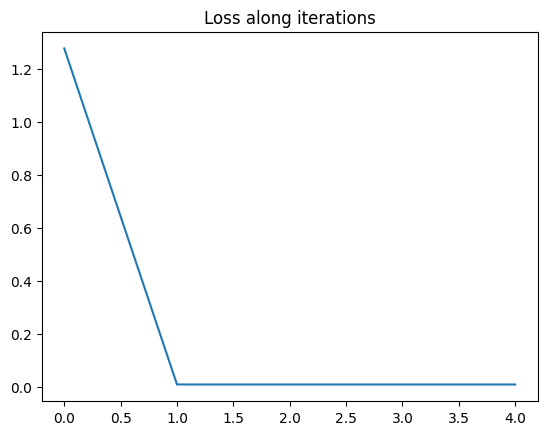

In [30]:
C1, C2, C1_opt, C2_opt = model1.model(X, y,epsilon =1e-2, tol= 1e-4, lr = 1, best_k = 5, n_neighbors = 6)

In [31]:
p = ot.unif(C1.shape[0])
q = ot.unif(C2.shape[0])
distance_C1_C2 = ot.gromov.entropic_gromov_wasserstein2(C1, C2, p, q, loss_fun = 'square_loss', epsilon=1e-2)
print('distance between C1 and C2:', distance_C1_C2)

distance between C1 and C2: 0.5283276628387987


In [32]:
p = ot.unif(C1_opt.shape[0])
q = ot.unif(C2_opt.shape[0])
distance_C1_opt_C2_opt = ot.gromov.entropic_gromov_wasserstein2(C1_opt, C2_opt, p, q, loss_fun = 'square_loss', epsilon=1e-2)
print('distance between C1_opt and C2_opt:', distance_C1_opt_C2_opt)

distance between C1_opt and C2_opt: 0.5283310278848244


In [33]:
p = ot.unif(C1_opt.shape[0])
q =  ot.unif(C2_opt.shape[0])
P = ot.gromov.entropic_gromov_wasserstein(C1_opt, C2_opt, p, q, loss_fun='square_loss', epsilon = 1e-1, log=False, verbose=True)

It.  |Err         
-------------------
    0|2.183112e-04|
   10|6.422328e-06|
   20|4.615994e-08|
   30|3.310828e-10|


In [34]:
# projection
#Projecting the first domain onto the second domain
y_new=normalize(y)
weights=np.sum(P,axis = 0)
X_new =np.matmul(P, normalize(y)) / weights[:, None]

In [35]:
import evals 

# We will use the average FOSCTTM measure implemented in evals.py for evaluation (metric used in the publication Demetci et al 2021)
# This measure reports the fraction of samples closer to a sample than its true match (FOSCTTM), averaged over all samples. 
fracs=evals.calc_domainAveraged_FOSCTTM(X_new, y_new)
print("Average FOSCTTM score for this alignment with X onto Y is: ", np.mean(fracs))

Average FOSCTTM score for this alignment with X onto Y is:  0.16355936382014716


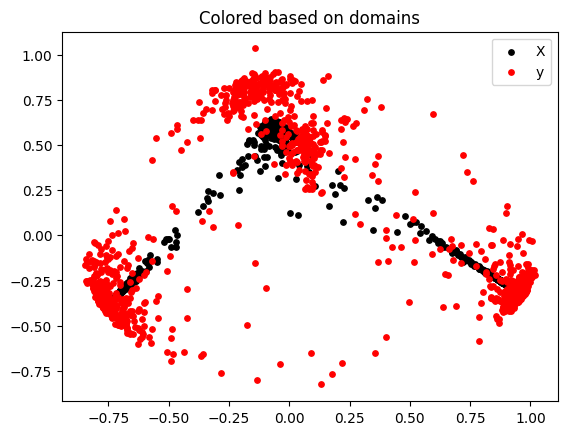

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Reduce the dimensionality of the aligned domains to two (2D) via PCA for the sake of visualization:
pca=PCA(n_components=2)
Xy_pca=pca.fit_transform(np.concatenate((X_new, y_new), axis=0))
X_pca = Xy_pca[0:X.shape[0],]
y_pca = Xy_pca[X.shape[0]:,]

#Plot aligned domains, samples colored by domain identity:
plt.scatter(X_pca[:,0], X_pca[:,1], c="k", s=15, label="X")
plt.scatter(y_pca[:,0], y_pca[:,1], c="r", s=15, label="y")
plt.legend()
plt.title("Colored based on domains")
plt.show()

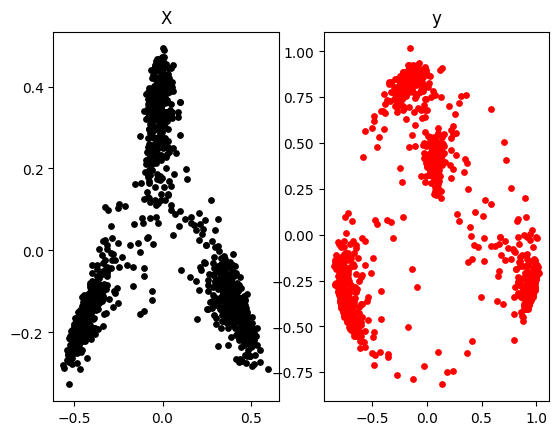

In [37]:
originalX_pca=pca.fit_transform(normalize(X))
originaly_pca=pca.fit_transform(normalize(y))

#Visualization of the global geometry
fig, (ax1, ax2)= plt.subplots(1,2)
ax1.scatter(originalX_pca[:,0], originalX_pca[:,1], c="k", s=15)
ax1.set_title("X")
# ax1.set_title("Chromatin Accessibiliy Domain \n *before* Alignment")
ax2.scatter(originaly_pca[:,0], originaly_pca[:,1], c="r", s=15)
# ax2.set_title("Gene Expression Domain \n *before* Alignment")
ax2.set_title("y")
plt.show()

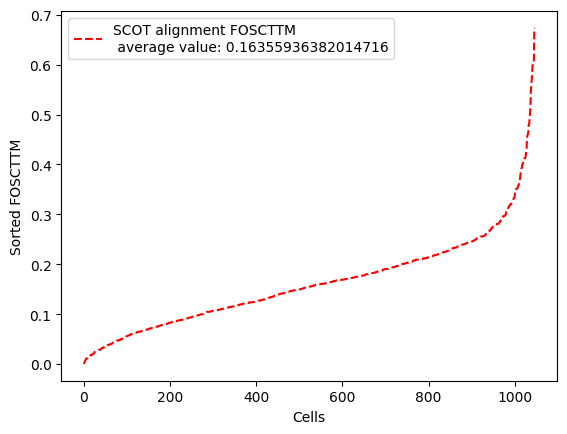

In [38]:
#Plotting sorted FOSCTTM to show the distributions of FOSCTTM across cells:

import matplotlib.pyplot as plt
legend_label="SCOT alignment FOSCTTM \n average value: "+str(np.mean(fracs)) #Put average FOSCTTM in the legend
plt.plot(np.arange(len(fracs)), np.sort(fracs), "r--", label=legend_label)
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()

In [39]:
# initialize SCOT object
original_scot=SCOT(X, y)
# call the alignment with l2 normalization 
X_new, y_new = original_scot.align(k=5, e=1e-3,  normalize=True, norm="l2")

It.  |Err         
-------------------
    0|1.935182e-03|
   10|7.241242e-04|
   20|1.441747e-04|
   30|1.538841e-05|
   40|7.094740e-06|
   50|3.195963e-06|
   60|1.343306e-06|
   70|5.458964e-07|
   80|2.186776e-07|
   90|8.708641e-08|
  100|3.459979e-08|
  110|1.373372e-08|
  120|5.449295e-09|
  130|2.161862e-09|
  140|8.576098e-10|


In [40]:
import evals 

# We will use the average FOSCTTM measure implemented in evals.py for evaluation (metric used in the publication Demetci et al 2021)
# This measure reports the fraction of samples closer to a sample than its true match (FOSCTTM), averaged over all samples. 
fracs=evals.calc_domainAveraged_FOSCTTM(X_new, y_new)
print("Average FOSCTTM score for this alignment with X onto Y is: ", np.mean(fracs))

Average FOSCTTM score for this alignment with X onto Y is:  0.23849485281629568


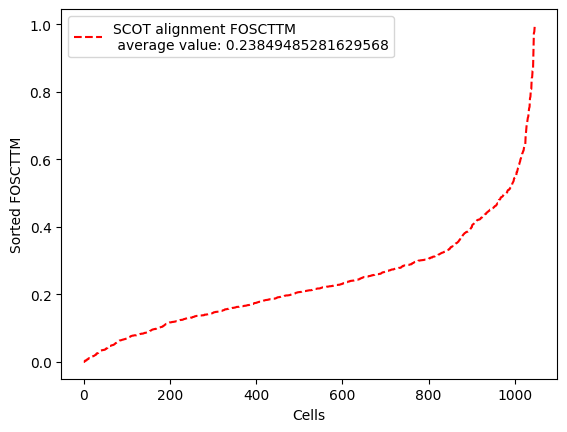

In [41]:
#Plotting sorted FOSCTTM to show the distributions of FOSCTTM across cells:

import matplotlib.pyplot as plt
legend_label="SCOT alignment FOSCTTM \n average value: "+str(np.mean(fracs)) #Put average FOSCTTM in the legend
plt.plot(np.arange(len(fracs)), np.sort(fracs), "r--", label=legend_label)
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()

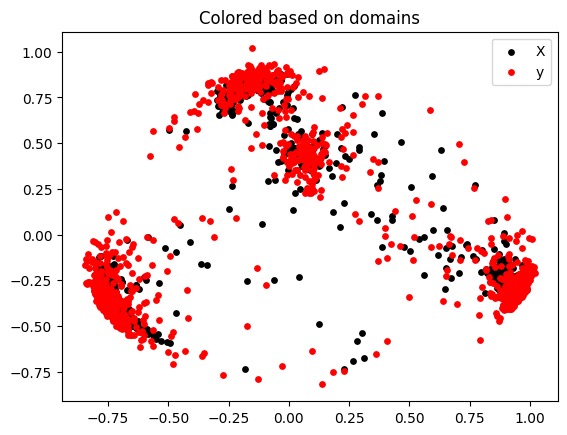

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Reduce the dimensionality of the aligned domains to two (2D) via PCA for the sake of visualization:
pca=PCA(n_components=2)
Xy_pca=pca.fit_transform(np.concatenate((X_new, y_new), axis=0))
X_pca = Xy_pca[0:X.shape[0],]
y_pca = Xy_pca[X.shape[0]:,]


#Plot aligned domains, samples colored by domain identity:
plt.scatter(X_pca[:,0], X_pca[:,1], c="k", s=15, label="X")
plt.scatter(y_pca[:,0], y_pca[:,1], c="r", s=15, label="y")
plt.legend()
plt.title("Colored based on domains")
plt.show()

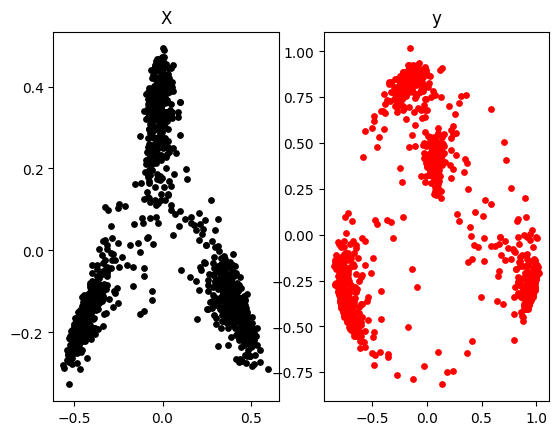

In [43]:
originalX_pca=pca.fit_transform(original_scot.X)
originaly_pca=pca.fit_transform(original_scot.y)

#Visualization of the global geometry
fig, (ax1, ax2)= plt.subplots(1,2)
ax1.scatter(originalX_pca[:,0], originalX_pca[:,1], c="k", s=15)
# ax1.set_title("Chromatin Accessibiliy Domain \n *before* Alignment")
ax1.set_title("X")
ax2.scatter(originaly_pca[:,0], originaly_pca[:,1], c="r", s=15)
# ax2.set_title("Gene Expression Domain \n *before* Alignment")
ax2.set_title("y")
plt.show()

#### Conclusion: Model 1 still gives a better allignment than SCOT, and the Gromov-Wasserstein Distance between C1_opt and C2_opt is also minimzed.